# 1: Preferential Attachment Model.
**- UNdirected Graph**

In [1]:
import networkx as nx

G = nx.Graph()
G.add_edges_from([('A', 'B'),('A','H'),('A','G'), ('B', 'C'), ('C', 'E'),
                  ('C', 'D'), ('D', 'F'),('F', 'G'), ('F', 'I'), ('G', 'I'),
                  ('G', 'H')])

In [2]:
degrees = G.degree()
degrees

{'A': 3, 'B': 2, 'C': 3, 'D': 2, 'E': 1, 'F': 3, 'G': 4, 'H': 2, 'I': 2}

In [3]:
# keep in mind : The elements in the set cannot be duplicates. 
print(set(degrees.values()))
degree_values = sorted(set(degrees.values()))
degree_values

{1, 2, 3, 4}


[1, 2, 3, 4]

In [4]:
histogram = [list(degrees.values()).count(i) / nx.number_of_nodes(G) for i in degree_values]
histogram

[0.1111111111111111,
 0.4444444444444444,
 0.3333333333333333,
 0.1111111111111111]

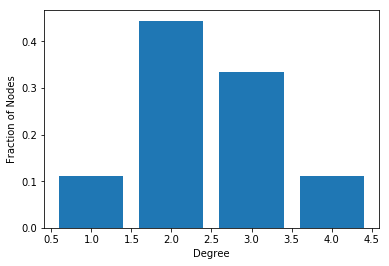

In [5]:
import matplotlib.pyplot as plt
plt.bar(degree_values , histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

**- Directed Graph**

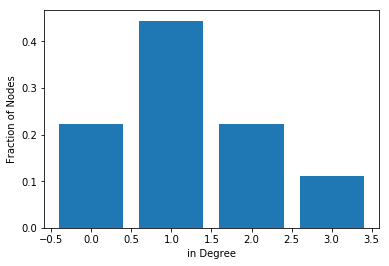

In [6]:
G = nx.DiGraph()
G.add_edges_from([('B', 'A'),('C','B'),('D','C'), ('E', 'C'), ('F', 'D'),
                  ('F', 'I'), ('G', 'F'),('G', 'A'), ('H', 'G'), ('H', 'A'),
                  ('G','I')])

in_degrees = G.in_degree()
in_degree_values = sorted(set(in_degrees.values()))
histogram = [list(in_degrees.values()).count(i) / nx.number_of_nodes(G) for i in in_degree_values]

import matplotlib.pyplot as plt
plt.bar(in_degree_values , histogram)
plt.xlabel('in Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

**- Preferential Attachment Model IN NetworkX**

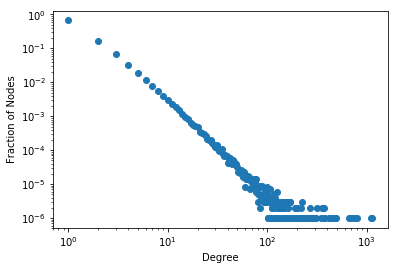

In [7]:
G = nx.barabasi_albert_graph(1000000,1)

degrees = G.degree()
degree_values = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i) / nx.number_of_nodes(G) for i in degree_values]

import matplotlib.pyplot as plt
plt.plot(degree_values , histogram , 'o')
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.xscale('log')
plt.yscale('log')
plt.show()

# 2: Small World Networks.

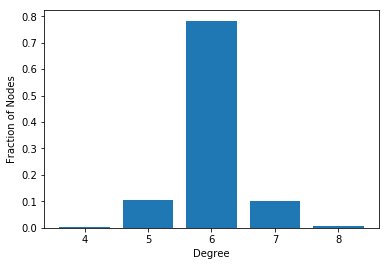

In [8]:
G = nx.watts_strogatz_graph(1000,6,0.04)

degrees = G.degree()
degree_values = sorted(set(degrees.values()))
histogram = [list(degrees.values()).count(i) / nx.number_of_nodes(G) for i in degree_values]

import matplotlib.pyplot as plt
plt.bar(degree_values , histogram)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.show()

`Q` : Is the degree distribution of small world network a power law distribution?

`A` : The degree distribution of small world network is not a power law because the degree of most nodes lie in the middle.

# 3: Link Prediction.
- **`Measure_1` : Common Neighbors**

In [9]:
G = nx.Graph()
G.add_edges_from([('A','B'),('A','D'),('A','E'), ('B','C'), ('B','D'),
                  ('C','D'), ('E','F'),('E','G'), ('F','G'), ('F','C'),
                  ('G','H') , ('G','I')])

In [10]:
not_edges = nx.non_edges(G)
# see what is the non connected edges in our Network:
# 1. put them in list and display some.
# print(list(not_edges)[:5])

# 2. or display all of them 
for edge in not_edges :
    print(edge)

('A', 'I')
('A', 'H')
('A', 'F')
('A', 'G')
('A', 'C')
('I', 'H')
('I', 'D')
('I', 'F')
('I', 'E')
('I', 'B')
('I', 'C')
('H', 'D')
('H', 'F')
('H', 'E')
('H', 'B')
('H', 'C')
('D', 'F')
('D', 'G')
('D', 'E')
('F', 'B')
('E', 'C')
('E', 'B')
('G', 'C')
('G', 'B')


In [11]:
# Then find the common neighbors between each of these non connected nodes.
A_F_neigh =list(nx.common_neighbors(G , 'A' , 'C')) 

print(len(A_F_neigh))
print(A_F_neigh)

2
['B', 'D']


In [12]:
not_edges = nx.non_edges(G)
common_neigh = [(e[0] , e[1] , len(list(nx.common_neighbors(G,e[0],e[1]))))
                   for e in not_edges]

sorted(common_neigh , key=lambda x:x[2] , reverse=True)[:7]

[('A', 'C', 2),
 ('A', 'F', 1),
 ('A', 'G', 1),
 ('I', 'H', 1),
 ('I', 'F', 1),
 ('I', 'E', 1),
 ('H', 'F', 1)]

- **`Measure_2` : Jaccard Coefficient**

In [13]:
# this func gives us Tuple has the non edges with its corresponding J_coff
J_coffs = list(nx.jaccard_coefficient(G))
sorted(J_coffs , key=lambda x:x[2] , reverse=True)

[('I', 'H', 1.0),
 ('A', 'C', 0.5),
 ('I', 'F', 0.3333333333333333),
 ('I', 'E', 0.3333333333333333),
 ('H', 'F', 0.3333333333333333),
 ('H', 'E', 0.3333333333333333),
 ('A', 'F', 0.2),
 ('D', 'F', 0.2),
 ('D', 'E', 0.2),
 ('F', 'B', 0.2),
 ('E', 'C', 0.2),
 ('E', 'B', 0.2),
 ('A', 'G', 0.16666666666666666),
 ('G', 'C', 0.16666666666666666),
 ('A', 'I', 0.0),
 ('A', 'H', 0.0),
 ('I', 'D', 0.0),
 ('I', 'B', 0.0),
 ('I', 'C', 0.0),
 ('H', 'D', 0.0),
 ('H', 'B', 0.0),
 ('H', 'C', 0.0),
 ('D', 'G', 0.0),
 ('G', 'B', 0.0)]

- **`Measure_3` : Resource Allocation**

In [14]:
resource_allo = list(nx.resource_allocation_index(G))
sorted(resource_allo , key=lambda x:x[2] , reverse=True)

[('A', 'C', 0.6666666666666666),
 ('A', 'F', 0.3333333333333333),
 ('A', 'G', 0.3333333333333333),
 ('D', 'F', 0.3333333333333333),
 ('D', 'E', 0.3333333333333333),
 ('F', 'B', 0.3333333333333333),
 ('E', 'C', 0.3333333333333333),
 ('E', 'B', 0.3333333333333333),
 ('G', 'C', 0.3333333333333333),
 ('I', 'H', 0.25),
 ('I', 'F', 0.25),
 ('I', 'E', 0.25),
 ('H', 'F', 0.25),
 ('H', 'E', 0.25),
 ('A', 'I', 0),
 ('A', 'H', 0),
 ('I', 'D', 0),
 ('I', 'B', 0),
 ('I', 'C', 0),
 ('H', 'D', 0),
 ('H', 'B', 0),
 ('H', 'C', 0),
 ('D', 'G', 0),
 ('G', 'B', 0)]

- **`Measure_4` : Adamic-Adar Index**

In [15]:
adami_adar = list(nx.adamic_adar_index(G))
sorted(adami_adar , key=lambda x:x[2] , reverse=True)

[('A', 'C', 1.8204784532536746),
 ('A', 'F', 0.9102392266268373),
 ('A', 'G', 0.9102392266268373),
 ('D', 'F', 0.9102392266268373),
 ('D', 'E', 0.9102392266268373),
 ('F', 'B', 0.9102392266268373),
 ('E', 'C', 0.9102392266268373),
 ('E', 'B', 0.9102392266268373),
 ('G', 'C', 0.9102392266268373),
 ('I', 'H', 0.7213475204444817),
 ('I', 'F', 0.7213475204444817),
 ('I', 'E', 0.7213475204444817),
 ('H', 'F', 0.7213475204444817),
 ('H', 'E', 0.7213475204444817),
 ('A', 'I', 0),
 ('A', 'H', 0),
 ('I', 'D', 0),
 ('I', 'B', 0),
 ('I', 'C', 0),
 ('H', 'D', 0),
 ('H', 'B', 0),
 ('H', 'C', 0),
 ('D', 'G', 0),
 ('G', 'B', 0)]

- **`Measure_5` : Pref.Attachment**

In [16]:
pref_attach = list(nx.preferential_attachment(G))
sorted(pref_attach , key=lambda x:x[2] , reverse=True)

[('A', 'G', 12),
 ('D', 'G', 12),
 ('G', 'C', 12),
 ('G', 'B', 12),
 ('A', 'F', 9),
 ('A', 'C', 9),
 ('D', 'F', 9),
 ('D', 'E', 9),
 ('F', 'B', 9),
 ('E', 'C', 9),
 ('E', 'B', 9),
 ('A', 'I', 3),
 ('A', 'H', 3),
 ('I', 'D', 3),
 ('I', 'F', 3),
 ('I', 'E', 3),
 ('I', 'B', 3),
 ('I', 'C', 3),
 ('H', 'D', 3),
 ('H', 'F', 3),
 ('H', 'E', 3),
 ('H', 'B', 3),
 ('H', 'C', 3),
 ('I', 'H', 1)]

- **`Measure_6` : Community Common Neighbors**

*First : we need to assign each node to its community*

*Second : Apply the CCN Model*

In [17]:
G.node['A']['community']=0
G.node['B']['community']=0
G.node['C']['community']=0
G.node['D']['community']=0
G.node['E']['community']=1
G.node['F']['community']=1
G.node['G']['community']=1
G.node['H']['community']=1
G.node['I']['community']=1

In [18]:
Com_Common_Neigh = list(nx.cn_soundarajan_hopcroft(G))
sorted(Com_Common_Neigh , key=lambda x:x[2] , reverse=True)

[('A', 'C', 4),
 ('I', 'H', 2),
 ('I', 'F', 2),
 ('I', 'E', 2),
 ('H', 'F', 2),
 ('H', 'E', 2),
 ('A', 'F', 1),
 ('A', 'G', 1),
 ('D', 'F', 1),
 ('D', 'E', 1),
 ('F', 'B', 1),
 ('E', 'C', 1),
 ('E', 'B', 1),
 ('G', 'C', 1),
 ('A', 'I', 0),
 ('A', 'H', 0),
 ('I', 'D', 0),
 ('I', 'B', 0),
 ('I', 'C', 0),
 ('H', 'D', 0),
 ('H', 'B', 0),
 ('H', 'C', 0),
 ('D', 'G', 0),
 ('G', 'B', 0)]

- **`Measure_7` : Community Resource Allocation**

In [19]:
Com_Resource_Allo = list(nx.ra_index_soundarajan_hopcroft(G))
sorted(Com_Resource_Allo , key=lambda x:x[2] , reverse=True)

[('A', 'C', 0.6666666666666666),
 ('I', 'H', 0.25),
 ('I', 'F', 0.25),
 ('I', 'E', 0.25),
 ('H', 'F', 0.25),
 ('H', 'E', 0.25),
 ('A', 'I', 0),
 ('A', 'H', 0),
 ('A', 'F', 0),
 ('A', 'G', 0),
 ('I', 'D', 0),
 ('I', 'B', 0),
 ('I', 'C', 0),
 ('H', 'D', 0),
 ('H', 'B', 0),
 ('H', 'C', 0),
 ('D', 'F', 0),
 ('D', 'G', 0),
 ('D', 'E', 0),
 ('F', 'B', 0),
 ('E', 'C', 0),
 ('E', 'B', 0),
 ('G', 'C', 0),
 ('G', 'B', 0)]

## Important Notes.
**I want to point out two things:**

- `One`, none of these measures actually tell you whether or not you should predict that a particular edge is going to come up in the future or not. It just gives a score that is supposed to give you a sense for whether or not these two nodes are likely to connect.


- `Second` thing is that different measures can give you different scores, right? So for example, we saw that some measures would give the edge H, I, a higher score that A,G and some measures would do the opposite. And so these measures aren't necessarily consistent with each other.


- `SOLUTION` So if you're actually trying to solve the link-prediction problem, typically what would happen is that you would use these measures as features. And then you would use a classifier, if you have some label data, you would train a classifier and use these measures as features in order to make the prediction, and this brings us to how to extract **Graph Features** .
# 4: Graph Features.

In [20]:
import networkx as nx
import pandas as pd

G = nx.read_gpickle('major_us_cities')

# Node
## Our mission now is to grap these `Nodes attributes` and put them into df To create Node based Features.


In [21]:
G.nodes(data=True)[:10]

[('El Paso, TX', {'location': (-106, 31), 'population': 674433}),
 ('Long Beach, CA', {'location': (-118, 33), 'population': 469428}),
 ('Dallas, TX', {'location': (-96, 32), 'population': 1257676}),
 ('Oakland, CA', {'location': (-122, 37), 'population': 406253}),
 ('Albuquerque, NM', {'location': (-106, 35), 'population': 556495}),
 ('Baltimore, MD', {'location': (-76, 39), 'population': 622104}),
 ('Raleigh, NC', {'location': (-78, 35), 'population': 431746}),
 ('Mesa, AZ', {'location': (-111, 33), 'population': 457587}),
 ('Arlington, TX', {'location': (-97, 32), 'population': 379577}),
 ('Sacramento, CA', {'location': (-121, 38), 'population': 479686})]

-  Nodes are cities in different states have an attributes like `Location` & `population`.


**1. Initialize the dataframe, using the nodes as the index.**

In [22]:
df = pd.DataFrame(index=G.nodes())
df.head()

""
"El Paso, TX"
"Long Beach, CA"
"Dallas, TX"
"Oakland, CA"
"Albuquerque, NM"


**2. Extracting attributes : Using `nx.get_node_attributes` to get `Location` & `population`, it's easy to extract the node attributes in the graph into DataFrame columns.**

In [23]:
pd.Series(nx.get_node_attributes(G,'location')).head()

Albuquerque, NM    (-106, 35)
Arlington, TX       (-97, 32)
Atlanta, GA         (-84, 33)
Austin, TX          (-97, 30)
Baltimore, MD       (-76, 39)
dtype: object

In [24]:
df['location'] = pd.Series(nx.get_node_attributes(G,'location'))
df['population'] = pd.Series(nx.get_node_attributes(G,'population'))
df.head()

,location,population
"El Paso, TX","(-106, 31)",674433
"Long Beach, CA","(-118, 33)",469428
"Dallas, TX","(-96, 32)",1257676
"Oakland, CA","(-122, 37)",406253
"Albuquerque, NM","(-106, 35)",556495


**3. Creating node based features : Most of the networkx functions related to nodes return a dictionary, which can also easily be added to our dataframe.**

In [25]:
pd.Series(nx.clustering(G)).head()

Albuquerque, NM    0.523810
Arlington, TX      0.763636
Atlanta, GA        0.611111
Austin, TX         0.892857
Baltimore, MD      0.800000
dtype: float64

In [26]:
df['clustering'] = pd.Series(nx.clustering(G))
df['degree'] = pd.Series(G.degree())
df.head()

,location,population,clustering,degree
"El Paso, TX","(-106, 31)",674433,0.700000,5
"Long Beach, CA","(-118, 33)",469428,0.745455,11
"Dallas, TX","(-96, 32)",1257676,0.763636,11
"Oakland, CA","(-122, 37)",406253,1.000000,8
"Albuquerque, NM","(-106, 35)",556495,0.523810,7


# Edge
## Our mission now is to grap these `Edges attributes` and put them into df To create Edge based Features.

In [27]:
G.edges(data=True)[:10]

[('El Paso, TX', 'Albuquerque, NM', {'weight': 367.88584356108345}),
 ('El Paso, TX', 'Mesa, AZ', {'weight': 536.256659972679}),
 ('El Paso, TX', 'Tucson, AZ', {'weight': 425.41386739988224}),
 ('El Paso, TX', 'Phoenix, AZ', {'weight': 558.7835703774161}),
 ('El Paso, TX', 'Colorado Springs, CO', {'weight': 797.7517116740046}),
 ('Long Beach, CA', 'Oakland, CA', {'weight': 579.5829987228403}),
 ('Long Beach, CA', 'Mesa, AZ', {'weight': 590.156204210031}),
 ('Long Beach, CA', 'Sacramento, CA', {'weight': 611.0649790490104}),
 ('Long Beach, CA', 'Tucson, AZ', {'weight': 698.6566667728368}),
 ('Long Beach, CA', 'San Jose, CA', {'weight': 518.2330606219175})]

**1. Initialize the dataframe, using the edges as the index.**

In [28]:
df = pd.DataFrame(index=G.edges())
df.head()

""
"(El Paso, TX, Albuquerque, NM)"
"(El Paso, TX, Mesa, AZ)"
"(El Paso, TX, Tucson, AZ)"
"(El Paso, TX, Phoenix, AZ)"
"(El Paso, TX, Colorado Springs, CO)"


**2. `Extracting attributes` :**

**Using nx.get_edge_attributes, it's easy to extract the edge attributes in the graph into DataFrame columns.**

In [29]:
pd.Series(nx.get_edge_attributes(G,'weight')).head()

Albuquerque, NM  Colorado Springs, CO    445.640004
                 Denver, CO              536.429183
                 Las Vegas, NV           779.953417
                 Mesa, AZ                514.567547
                 Phoenix, AZ             534.040759
dtype: float64

In [30]:
df['weight'] = pd.Series(nx.get_edge_attributes(G,'weight'))
df.head()

,weight
"(El Paso, TX, Albuquerque, NM)",367.885844
"(El Paso, TX, Mesa, AZ)",536.256660
"(El Paso, TX, Tucson, AZ)",425.413867
"(El Paso, TX, Phoenix, AZ)",558.783570
"(El Paso, TX, Colorado Springs, CO)",797.751712


**3. Creating edge based features :**

**Many of the networkx functions related to edges return a nested data structures. We can extract the relevant data using list comprehension.**

In [31]:
list(nx.preferential_attachment(G,df.index))[:5]

[('El Paso, TX', 'Albuquerque, NM', 35),
 ('El Paso, TX', 'Mesa, AZ', 40),
 ('El Paso, TX', 'Tucson, AZ', 40),
 ('El Paso, TX', 'Phoenix, AZ', 45),
 ('El Paso, TX', 'Colorado Springs, CO', 30)]

In [32]:
df.index[:5]

Index([     ('El Paso, TX', 'Albuquerque, NM'),
                   ('El Paso, TX', 'Mesa, AZ'),
                 ('El Paso, TX', 'Tucson, AZ'),
                ('El Paso, TX', 'Phoenix, AZ'),
       ('El Paso, TX', 'Colorado Springs, CO')],
      dtype='object')

In [33]:
df['preferential attachment'] = [i[2] for i in
                                 nx.preferential_attachment(G,df.index)]
df.head()

,weight,preferential attachment
"(El Paso, TX, Albuquerque, NM)",367.885844,35
"(El Paso, TX, Mesa, AZ)",536.256660,40
"(El Paso, TX, Tucson, AZ)",425.413867,40
"(El Paso, TX, Phoenix, AZ)",558.783570,45
"(El Paso, TX, Colorado Springs, CO)",797.751712,30


**If**:
In the case where the function expects `2 nodes to be passed in`, we can `map` the index to a `lambda` function.

In [34]:
df['Common Neighbors']= df.index.map(lambda city :
                        len(list(nx.common_neighbors(G,city[0],city[1]))))
df.head()

,weight,preferential attachment,Common Neighbors
"(El Paso, TX, Albuquerque, NM)",367.885844,35,4
"(El Paso, TX, Mesa, AZ)",536.256660,40,3
"(El Paso, TX, Tucson, AZ)",425.413867,40,3
"(El Paso, TX, Phoenix, AZ)",558.783570,45,3
"(El Paso, TX, Colorado Springs, CO)",797.751712,30,1


## Important Notes.
**I want to point out two things:**

- `One`, none of these measures actually tell you whether or not you should predict that a particular edge is going to come up in the future or not. It just gives a score that is supposed to give you a sense for whether or not these two nodes are likely to connect.


- `Second` thing is that different measures can give you different scores, right? So for example, we saw that some measures would give the edge H, I, a higher score that A,G and some measures would do the opposite. And so these measures aren't necessarily consistent with each other.


- `SOLUTION`So if you're actually trying to solve the link-prediction problem, typically what would happen is that you would use these measures as features. And then you would use a classifier, if you have some label data, you would train a classifier and use these measures as features in order to make the prediction.

# Module 4 Quiz.
## Q1:

<IPython.core.display.Javascript object>


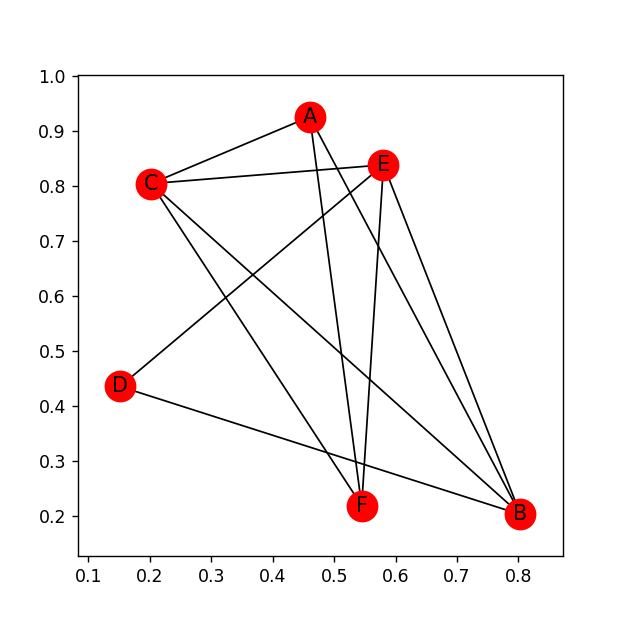

In [45]:
%matplotlib notebook

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([('A', 'B'),('A','F'),('A','C'), ('B', 'C'), ('B', 'E'),
            ('B', 'D'), ('C', 'F'),('C', 'E'), ('D', 'E'), ('E', 'F')])

plt.figure(figsize=(5,5))
position = nx.random_layout(G)
nx.draw_networkx(G ,position)

In [46]:
G.degree() , len(G.nodes())

({'A': 3, 'B': 4, 'C': 4, 'D': 2, 'E': 4, 'F': 3}, 6)

In [48]:
p_2 = 1/6
p_3 = 2/6

p_2 + p_3

0.5

## Q2:

<IPython.core.display.Javascript object>


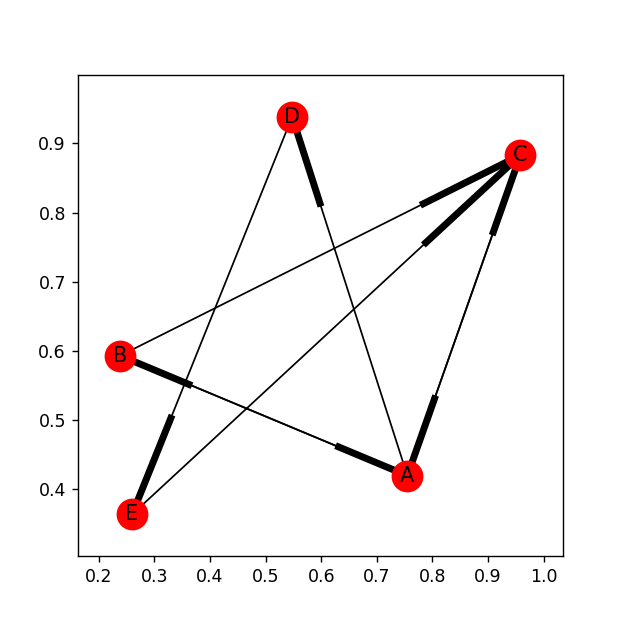

In [50]:
G = nx.DiGraph()
G.add_edges_from([('A', 'B'),('B','A'),('A','D'), ('B', 'C'), ('A', 'C'),
            ('C', 'A'), ('D', 'E'),('E', 'C')])

plt.figure(figsize=(5,5))
position = nx.random_layout(G)
nx.draw_networkx(G ,position)

In [53]:
len(G.nodes()) , G.in_degree()

(5, {'A': 2, 'B': 1, 'C': 3, 'D': 1, 'E': 1})

k = 1 is the most common degree

since our denominator is a fixed value nx.number_of_nodes(g)

3/nx.number_of_nodes(g) is the highest we can achieve

In [55]:
Q2 = 1
Q2

1

## Q3:
`Select all that apply`:
- If we draw apower law distribution in log-log scale,  the distribution will look like a straight line.

- The Preferential Attachment Model generates a network with a power law degree distribution.

## Q4:
`Select all that apply`:
- Some Small-world networks have high local clustering coefficient and small average shortest path.

- In the small-world model starting with k nearest neighbors, increasing the rewiring probability p generally decreases both the average clustering coefficient and average shortest path.

## Q5:
**Suppose we want to generate several small-world networks with k nearest neighbors and rewiring probability p. `If p remains the same and we increase k`:which best describes the variation of average local clustering coefficient and average shortest path?**
- Average local clustering coefficient will increase and average shortest path will decrease.

## Q6:
**Based on the network below, suppose we want to apply the common neighbors
measure to add an edge from node H, which is the most probable node to connect to H?**

<IPython.core.display.Javascript object>


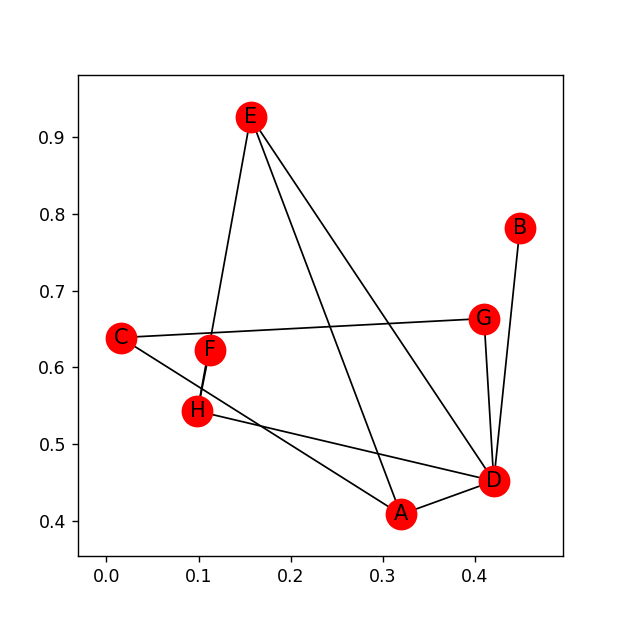

In [62]:
G = nx.Graph()
G.add_edges_from([('A', 'D'),('A','E'),('A','C'), ('B', 'D'), ('C', 'G'),
            ('D', 'H'), ('D', 'E'),('E', 'H'), ('F', 'H'), ('D', 'G')])

plt.figure(figsize=(5,5))
position = nx.random_layout(G)
nx.draw_networkx(G ,position)

In [64]:
not_edges = nx.non_edges(G)
for edge in not_edges:
    print(edge)

('A', 'F')
('A', 'G')
('A', 'H')
('A', 'B')
('H', 'G')
('H', 'C')
('H', 'B')
('D', 'F')
('D', 'C')
('G', 'F')
('G', 'E')
('G', 'B')
('E', 'F')
('E', 'C')
('E', 'B')
('F', 'C')
('F', 'B')
('B', 'C')


In [66]:
not_edges = nx.non_edges(G)
common_neigh = [(e[0] , e[1] ,len(list(nx.common_neighbors(G,e[0],e[1]))))
                 for e in not_edges]
sorted(common_neigh , key=lambda x:x[2] , reverse=True)         

[('A', 'G', 2),
 ('A', 'H', 2),
 ('D', 'C', 2),
 ('A', 'B', 1),
 ('H', 'G', 1),
 ('H', 'B', 1),
 ('D', 'F', 1),
 ('G', 'E', 1),
 ('G', 'B', 1),
 ('E', 'F', 1),
 ('E', 'C', 1),
 ('E', 'B', 1),
 ('A', 'F', 0),
 ('H', 'C', 0),
 ('G', 'F', 0),
 ('F', 'C', 0),
 ('F', 'B', 0),
 ('B', 'C', 0)]

In [68]:
pairs_H = [(node, h, common)
        for (node, h, common) in common_neigh if (node == 'H' or h == 'H')]
pairs_H


[('A', 'H', 2), ('H', 'G', 1), ('H', 'C', 0), ('H', 'B', 1)]

SO, the answer is `node A`

## Q7:
**Based on the network above, what is the Jaccard coefficient of nodes D and C?**

In [72]:
J_coeff = list(nx.jaccard_coefficient(G))
[t for t in J_coeff if (t[0] == 'D' and t[1]=='C')]  # t = tuple

[('D', 'C', 0.4)]

## Q8:
**Based on the network above, if we apply Resource Allocation method to
predict the new edges, what is the value of Resource Allocation index of nodes C and D?**

In [76]:
resource_allo = list(nx.resource_allocation_index(G))
[t for t in resource_allo if (t[0] == 'D' and t[1]=='C')]  # t = tuple

[('D', 'C', 0.8333333333333333)]

## Q9:
**Based on the network below, what is the preferential attachment score of
nodes C and D?**

In [77]:
pref_attach = list(nx.preferential_attachment(G))
[t for t in pref_attach if (t[0] == 'D' and t[1]=='C')]  # t = tuple

[('D', 'C', 10)]

## Q10:
**Assume there are two communities in this network: {A, B, C, D, G} and {E, F, H}. Which of the following statements is(are) True? Select all that apply.**

In [83]:
G.node['A']['community']=0
G.node['B']['community']=0
G.node['C']['community']=0
G.node['D']['community']=0
G.node['G']['community']=0
G.node['F']['community']=1
G.node['E']['community']=1
G.node['H']['community']=1

Com_Common_Neigh = list(nx.cn_soundarajan_hopcroft(G))
# t = tuple
print([t for t in Com_Common_Neigh if (t[0] == 'D' and t[1]=='C')])
print([t for t in Com_Common_Neigh if (t[0] == 'A' and t[1]=='G')])

[('D', 'C', 4)]
[('A', 'G', 4)]


In [84]:
Com_Resource_Allo = list(nx.ra_index_soundarajan_hopcroft(G))
print([t for t in Com_Resource_Allo if (t[0] == 'E' and t[1]=='F')])
print([t for t in Com_Resource_Allo if (t[0] == 'A' and t[1]=='G')])

[('E', 'F', 0.3333333333333333)]
[('A', 'G', 0.7)]
